# Proyek Akhir : Klasifikasi Gambar
- Nama: Isna Nur Amalia
- Email: isnanuramalia13@gmail.com
- Id Dicoding:
- Dataset: https://github.com/DrGFreeman/rps-cv
- GitHub: https://github.com/isnanramalia/dicoding-latihanDataMining/tree/main/proyek_akhir_machineLearning

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
PARENT_DIR = 'rockpaperscissors/rps-cv-images'
rock_child_dir = os.path.join(PARENT_DIR,'rock')
paper_child_dir = os.path.join(PARENT_DIR,'paper')
scissors_child_dir = os.path.join(PARENT_DIR,'scissors')
os.listdir(PARENT_DIR)

['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors']

## Checking child folder which contains image

In [3]:
print('Data from Rock Directory')
print(os.listdir(rock_child_dir))
print('Data from Paper Directory')
print(os.listdir(paper_child_dir))
print('Data from Scissors Directory')
print(os.listdir(scissors_child_dir))

Data from Rock Directory
['00nKV8oHuTGi20gq.png', '01dM3ewPIsnBICu1.png', '02vG75hQW9Vp4oTl.png', '0bioBZYFCXqJIulm.png', '0NDYNEoDui7o64gU.png', '0OEXfEooCXlljaEl.png', '0P6uxM8Vr1DwySHe.png', '19H63c0MWD56EWNq.png', '1BqjHe5igJAgUjiN.png', '1COBZEE1ALiJIivQ.png', '1DxbXT3M2qiMjCmC.png', '1e1VCnCEApnFh9Oo.png', '1mnAKQCHEDbtjPX2.png', '1MOm36DHK0R8OfIC.png', '1UucZqS3qblvU0cH.png', '1UXuUYJ4rVj2eSvt.png', '1VoYiUgPE6h45MLu.png', '1vvcitV1s17gKdbn.png', '1wk2Hl1Ih9guOwx6.png', '1WuMUpzupKs67q29.png', '2affjOmZChc9AXpR.png', '2DdERUV7Te8ivywq.png', '2EAkMCm7ZLnNoBQ7.png', '2f25VA1nfxiC86xj.png', '2HSPQEteONUjEXAF.png', '2j9iOcnxJzcyaFB5.png', '2JRYQXb5kmlhgD5i.png', '2MKZD0VUw7Tez2Jx.png', '2NmrcDGkc7FQuu12.png', '2nSUlcvPf1DOCo1j.png', '2O9XPBJRT119drWX.png', '2Pt5UNQkMzXLtbEp.png', '2UaJz6Z3xJv3WX9h.png', '2uVMdMj10yjpR6Py.png', '2uxDLQKemRqulhIx.png', '2vwLOZSd8FCXbuck.png', '32PDtFdAkUiAJbmP.png', '337ARHTZmhCSkoEM.png', '3aRXheNUQ6cxechp.png', '3k7WrSAInCaatFtl.png', '3MSy75FXVzhhL

In [4]:
rock_loaded_img = os.listdir(rock_child_dir)
paper_loaded_img = os.listdir(paper_child_dir)
scissors_loaded_img = os.listdir(scissors_child_dir)

## Display the Image

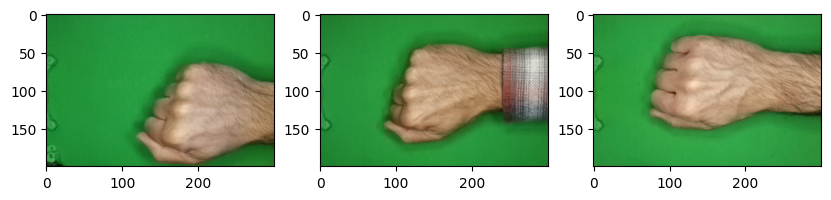

In [5]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(rock_loaded_img[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(rock_child_dir, img_path))
    plt.imshow(img)
plt.show()

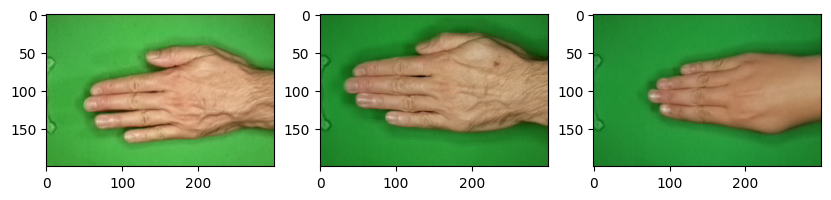

In [6]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(paper_loaded_img[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(paper_child_dir, img_path))
    plt.imshow(img)
plt.show()

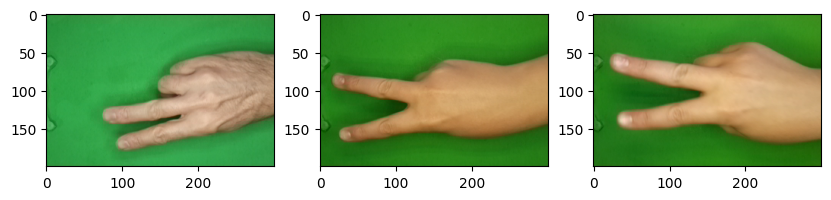

In [7]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(scissors_loaded_img[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(scissors_child_dir, img_path))
    plt.imshow(img)
plt.show()

## Separating data into Training set and Validation set

In [8]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

data_generator = ImageDataGenerator(validation_split=0.4,
                                    rotation_range=20, 
                                    rescale=1./255)
generate_train = data_generator.flow_from_directory(PARENT_DIR,
                                                    target_size=(120, 120),
                                                    subset='training')
generate_validation = data_generator.flow_from_directory(PARENT_DIR,
                                                         target_size=(120, 120),
                                                         subset='validation')



Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## Preparing the sequential model

In [9]:
model = tf.keras.models.Sequential([
                                    
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120, 120, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 64)        0

## Making callback for reminder if the process completed

In [12]:
class TargetCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.95):
            print("\nModel Has Reached %2.2f%% accuracy, training stopped" %(logs.get('accuracy')*100))
            self.model.stop_training = True
callback = TargetCallback()

In [13]:
history = model.fit(
    generate_train,
    steps_per_epoch=25,
    epochs = 20,
    validation_data = generate_validation,
    validation_steps=5,
    verbose = 2,
    callbacks = [callback])

Epoch 1/20


25/25 - 32s - loss: 1.1272 - accuracy: 0.3961 - val_loss: 1.0682 - val_accuracy: 0.5813 - 32s/epoch - 1s/step
Epoch 2/20
25/25 - 21s - loss: 0.8040 - accuracy: 0.6429 - val_loss: 0.7256 - val_accuracy: 0.6812 - 21s/epoch - 854ms/step
Epoch 3/20
25/25 - 20s - loss: 0.5274 - accuracy: 0.8062 - val_loss: 0.3706 - val_accuracy: 0.8875 - 20s/epoch - 784ms/step
Epoch 4/20
25/25 - 18s - loss: 0.2486 - accuracy: 0.9052 - val_loss: 0.2361 - val_accuracy: 0.9187 - 18s/epoch - 737ms/step
Epoch 5/20
25/25 - 17s - loss: 0.1693 - accuracy: 0.9429 - val_loss: 0.2479 - val_accuracy: 0.9187 - 17s/epoch - 669ms/step
Epoch 6/20
25/25 - 17s - loss: 0.1723 - accuracy: 0.9450 - val_loss: 0.1250 - val_accuracy: 0.9625 - 17s/epoch - 676ms/step
Epoch 7/20
25/25 - 18s - loss: 0.1445 - accuracy: 0.9475 - val_loss: 0.1370 - val_accuracy: 0.9688 - 18s/epoch - 727ms/step
Epoch 8/20

Model Has Reached 95.25% accuracy, training stopped
25/25 - 17s - loss: 0.1588 - accuracy: 0.9525 - val_loss: 0.1101 - va

## Image prediction

1/1 [==============================] - 0s 261ms/step
Scissors


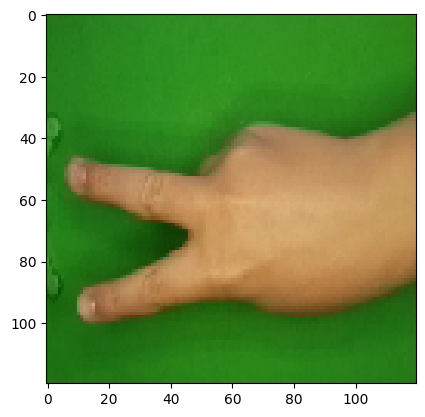

In [14]:
uploaded = os.path.join(scissors_child_dir,'0CSaM2vL2cWX6Cay.png')
img = image.load_img(uploaded, target_size = (120, 120))
 
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)  

if classes[0, 0] == 1:
  print('Paper')
elif classes[0, 1] == 1:
  print('Rock')
else:
  print('Scissors')

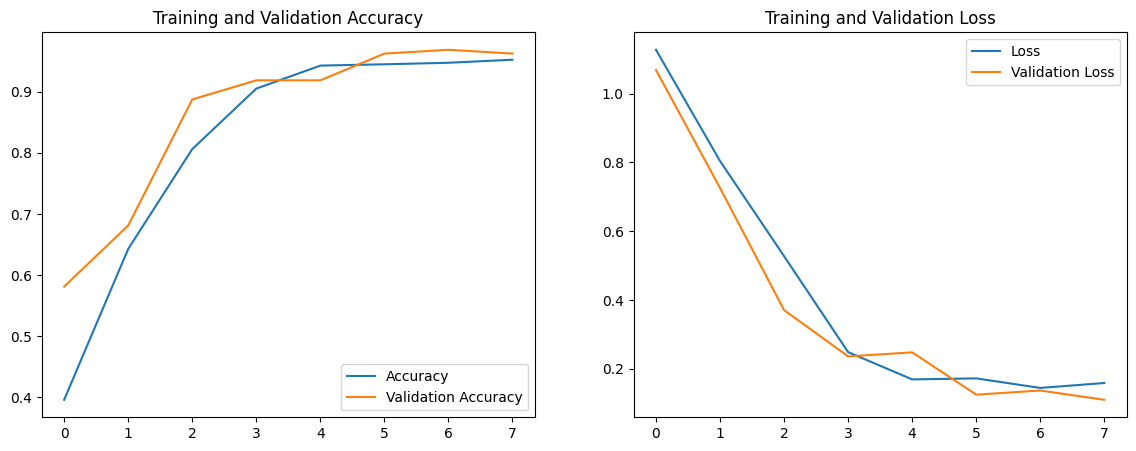

In [16]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy'),
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [22]:
# Menghitung akurasi dari model
evaluation = model.evaluate(generate_validation)
print("Validation Accuracy: {:.2f}%".format(evaluation[1] * 100))

28/28 [==============================] - 11s 392ms/step - loss: 0.1377 - accuracy: 0.9657
Validation Accuracy: 96.57%
